<a href="https://colab.research.google.com/github/keerthi2625/AIML/blob/main/LabExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1

In [10]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# Load the Iris dataset from UCI repository URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load dataset into a DataFrame
df = pd.read_csv(url, header=None, names=column_names)

# Split the data into features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN classifier with k=3: {accuracy * 100:.2f}%")

Accuracy of KNN classifier with k=3: 100.00%


Q2

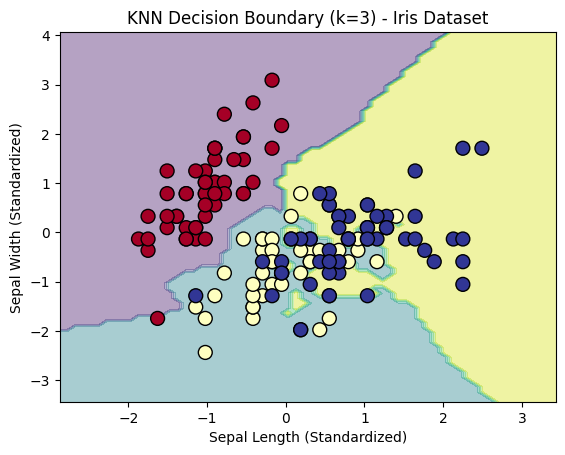

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = datasets.load_iris()

# Select only two features for 2D visualization
X = dataset.data[:, :2]  # Use the first two features (sepal length and sepal width)
y = dataset.target

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Create a meshgrid for plotting the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class labels for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap=plt.cm.RdYlBu)
plt.title('KNN Decision Boundary (k=3) - Iris Dataset')
plt.xlabel('Sepal Length (Standardized)')
plt.ylabel('Sepal Width (Standardized)')
plt.show()

Q3

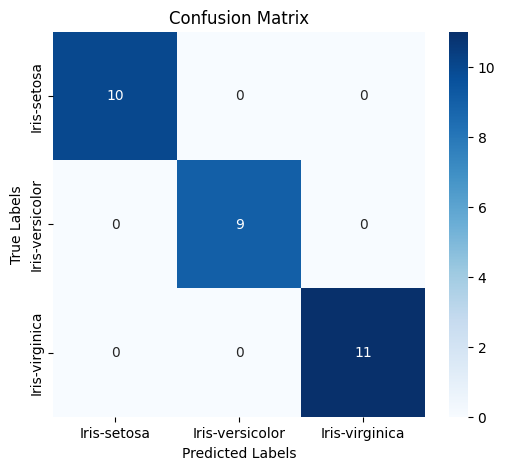

In [12]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset from UCI repository URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load dataset into a DataFrame
df = pd.read_csv(url, header=None, names=column_names)

# Split the data into features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

Q4

In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset from UCI repository URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load dataset into a DataFrame
df = pd.read_csv(url, header=None, names=column_names)

# Split the data into features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

# --- Without Feature Scaling ---
# Train the KNN model without scaling
knn.fit(X_train, y_train)
y_pred_no_scaling = knn.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

# --- With Feature Scaling ---
# Apply feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model with scaled features
knn.fit(X_train_scaled, y_train)
y_pred_with_scaling = knn.predict(X_test_scaled)
accuracy_with_scaling = accuracy_score(y_test, y_pred_with_scaling)

# Print the results
print(f"Accuracy without feature scaling: {accuracy_no_scaling * 100:.2f}%")
print(f"Accuracy with feature scaling: {accuracy_with_scaling * 100:.2f}%")

Accuracy without feature scaling: 100.00%
Accuracy with feature scaling: 100.00%


Q5

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset from UCI repository URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Load dataset into a DataFrame
df = pd.read_csv(url, header=None, names=column_names)

# Split the data into features (X) and target variable (y)
X = df.drop('species', axis=1)
y = df['species']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train KNN and evaluate performance
def evaluate_knn(k, X_train, X_test, y_train, y_test, scale=False):
    # Apply feature scaling if required
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

    # Initialize the KNN classifier with the given k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

# --- Without Feature Scaling ---
accuracy_k3_no_scaling = evaluate_knn(3, X_train, X_test, y_train, y_test, scale=False)
accuracy_k5_no_scaling = evaluate_knn(5, X_train, X_test, y_train, y_test, scale=False)

# --- With Feature Scaling ---
accuracy_k3_with_scaling = evaluate_knn(3, X_train, X_test, y_train, y_test, scale=True)
accuracy_k5_with_scaling = evaluate_knn(5, X_train, X_test, y_train, y_test, scale=True)

# Print the results
print(f"Accuracy with k=3 without scaling: {accuracy_k3_no_scaling * 100:.2f}%")
print(f"Accuracy with k=5 without scaling: {accuracy_k5_no_scaling * 100:.2f}%")
print(f"Accuracy with k=3 with scaling: {accuracy_k3_with_scaling * 100:.2f}%")
print(f"Accuracy with k=5 with scaling: {accuracy_k5_with_scaling * 100:.2f}%")

Accuracy with k=3 without scaling: 100.00%
Accuracy with k=5 without scaling: 100.00%
Accuracy with k=3 with scaling: 100.00%
Accuracy with k=5 with scaling: 100.00%
